## Vaibhav Kumar

### Fraud Detection System

#### Objective - Create a fraud detection system that can analyze transaction data and identify potentially fraudulent activities or transactions

#### Data source - https://www.kaggle.com/datasets/vardhansiramdasu/fraudulent-transactions-prediction/code

#### Required Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score , classification_report,precision_score,f1_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 

#### Import Data

In [2]:
df=pd.read_csv("C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Practice DataSet from Keggle\\fraud detect.csv")

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### Data Driscription

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


#### Data Visualization

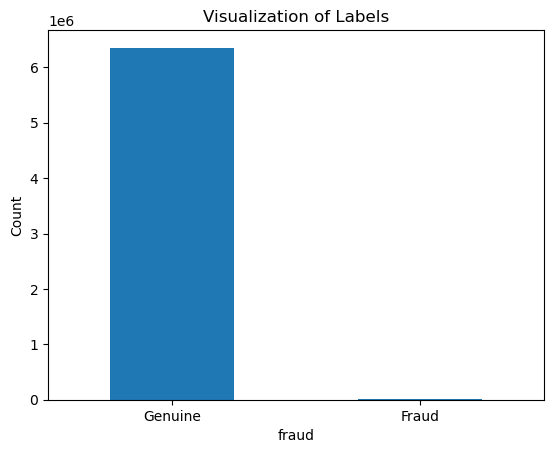

In [10]:
df['fraud'].value_counts().plot(kind='bar')
labels = ["Genuine", "Fraud"]
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels,rotation=0)
plt.show()

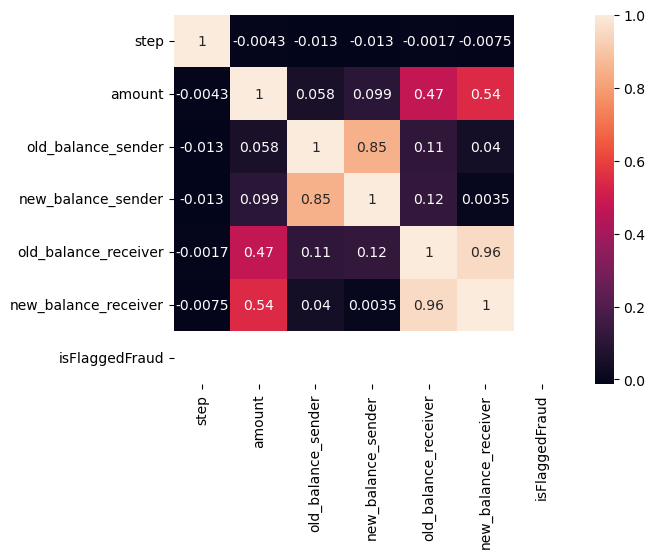

In [11]:
sns.heatmap(X_num.corr(),annot=True)
plt.show()

#### Data Preprocessing and Target Variable (y) and Feature Variables (X)

In [12]:
df.rename(columns={'oldbalanceOrg' : 'old_balance_sender',
                   'newbalanceOrig':'new_balance_sender',
                   'oldbalanceDest': 'old_balance_receiver',
                   'newbalanceDest': 'new_balance_receiver',
                    'isFraud' : 'fraud'
                  }, inplace=True)

In [13]:
X=df.drop(['fraud','nameOrig','nameDest'], axis = 1)
y=df['fraud']

In [14]:
X_cat=X.select_dtypes(include='object')
X_num=X.select_dtypes(exclude='object')
X_num=X_num.apply(lambda x: x.clip( lower = x.quantile(0.18), upper = x.quantile(0.82) ) )

In [15]:
X=pd.concat([X_cat, X_num], axis=1)

In [16]:
ct1= ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),['type']),
    ('std_scaler',StandardScaler(),['step','amount','old_balance_sender','new_balance_sender','old_balance_receiver',
                                    'new_balance_receiver'])
    ],remainder='drop')

#### Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Shape of train x : ",X_train.shape)
print("Shape of test x : ",X_test.shape)

Shape of train x :  (4262955, 8)
Shape of test x :  (2099665, 8)


#### Modeling

In [18]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [19]:
pipe_dtc = Pipeline([
    ('transform',ct1),
    ('xgb_model',xgb_model)])


In [20]:
pipe_dtc.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['type']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['step', 'amount',
                                                   'old_balance_sender',
                                                   'new_balance_sender',
                                                   'old_balance_receiver',
                                                   'new_balance_receiver'])])),
                ('xgb_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

#### Prediction

In [15]:
train_preds = pipe_dtc.predict(X_train)
test_preds = pipe_dtc.predict(X_test)

#### Model Evaluation

In [16]:
train_acc = accuracy_score(train_preds, y_train)
test_acc = accuracy_score(test_preds, y_test)
print(f"Train Accuracy:: {train_acc:.2f} \n Test Accuracy:: {test_acc:.2f}")

Train Accuracy:: 1.00 
 Test Accuracy:: 1.00


In [19]:
f1_recall = f1_score(y_test, test_preds)
print("The F1-Score is {}".format(f1_recall))


The F1-Score is 0.8127372416701814


In [17]:
cross_val_scores = cross_val_score(estimator=pipe_dtc, X = X_train, y = y_train, cv = 3)
cross_val_scores.mean()

0.9995599296731962

In [20]:
classification_report = classification_report(train_preds, y_train)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4258590
           1       0.76      0.97      0.85      4365

    accuracy                           1.00   4262955
   macro avg       0.88      0.99      0.93   4262955
weighted avg       1.00      1.00      1.00   4262955



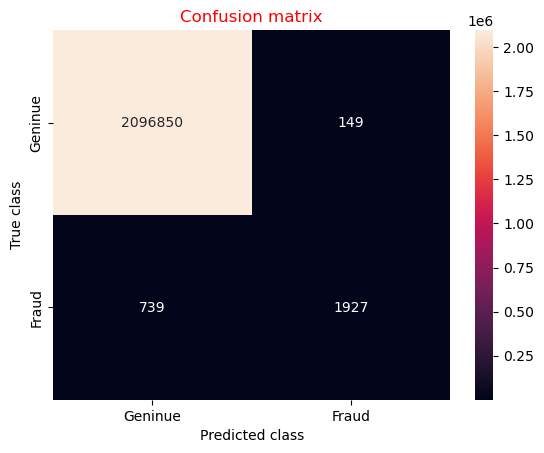

In [37]:
LABELS = ['Geninue', 'Fraud']
conf_matrix = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix",c='r')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Explaination - We get an accuracy of 0.9995599296731962 for our model which means our model is performing great.